In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [40]:
!pip install catboost

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

from joblib import dump, load
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

###Data load

In [42]:
df1=pd.read_csv("/content/drive/MyDrive/Work_space/Project/Be my voice/Sign to text/data set/data_sign1_2.csv")
df2=pd.read_csv("/content/drive/MyDrive/Work_space/Project/Be my voice/Sign to text/data set/data_sign2_2.csv")
df=pd.concat([df1,df2],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18308 entries, 0 to 16827
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x0      18308 non-null  int64 
 1   x1      18308 non-null  int64 
 2   x2      18308 non-null  int64 
 3   x3      18308 non-null  int64 
 4   x4      18308 non-null  int64 
 5   x5      18308 non-null  int64 
 6   x6      18308 non-null  int64 
 7   x7      18308 non-null  int64 
 8   x8      18308 non-null  int64 
 9   x9      18308 non-null  int64 
 10  x10     18308 non-null  int64 
 11  x11     18308 non-null  int64 
 12  x12     18308 non-null  int64 
 13  x13     18308 non-null  int64 
 14  x14     18308 non-null  int64 
 15  x15     18308 non-null  int64 
 16  x16     18308 non-null  int64 
 17  x17     18308 non-null  int64 
 18  x18     18308 non-null  int64 
 19  x19     18308 non-null  int64 
 20  x20     18308 non-null  int64 
 21  y0      18308 non-null  int64 
 22  y1      18308 non-null  int

In [43]:
label=list(df["0"])
df['Category']=[x.upper()for x in label]
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z13,z14,z15,z16,z17,z18,z19,z20,0,Category
0,63,100,131,164,191,90,162,198,220,81,...,-8,-13,-13,-11,-13,-16,-16,-14,0,0
1,90,157,183,212,233,66,126,187,231,56,...,-14,-21,-20,-17,-24,-28,-25,-21,0,0
2,68,83,101,121,144,94,160,199,225,96,...,-23,-32,-34,-34,-22,-29,-31,-32,0,0
3,84,117,148,181,205,97,153,203,232,86,...,-42,-56,-56,-55,-36,-48,-50,-51,0,0
4,115,76,82,124,162,107,153,177,196,140,...,-13,-21,-22,-22,-11,-18,-21,-23,0,0


###Classification_model (label encoding)

In [44]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Category' column
df['Category_Encoded'] = le.fit_transform(df['Category'])

In [45]:
# Create a mapping of categories to encoded values
category_mapping = dict(zip( le.transform(le.classes_),le.classes_))

print("classes:")
print(le.classes_)

print("\nCategory to Encoding Mapping:")
print(category_mapping)

classes:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'DEL' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'SPACE' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z']

Category to Encoding Mapping:
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'DEL', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K', 22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'SPACE', 31: 'T', 32: 'U', 33: 'V', 34: 'W', 35: 'X', 36: 'Y', 37: 'Z'}


In [46]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z14,z15,z16,z17,z18,z19,z20,0,Category,Category_Encoded
0,63,100,131,164,191,90,162,198,220,81,...,-13,-13,-11,-13,-16,-16,-14,0,0,0
1,90,157,183,212,233,66,126,187,231,56,...,-21,-20,-17,-24,-28,-25,-21,0,0,0
2,68,83,101,121,144,94,160,199,225,96,...,-32,-34,-34,-22,-29,-31,-32,0,0,0
3,84,117,148,181,205,97,153,203,232,86,...,-56,-56,-55,-36,-48,-50,-51,0,0,0
4,115,76,82,124,162,107,153,177,196,140,...,-21,-22,-22,-11,-18,-21,-23,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
X=df.iloc[:,:63].values
Y=df.iloc[:,-1].values

print(X.shape)
print(Y.shape)

(18308, 63)
(18308,)


In [49]:
print(X)
print(Y)

[[ 63 100 131 ... -16 -16 -14]
 [ 90 157 183 ... -28 -25 -21]
 [ 68  83 101 ... -29 -31 -32]
 ...
 [228 244 233 ...  -5  -6  -6]
 [194 225 240 ...  -7  -9  -9]
 [239 246 231 ...  -4  -5  -5]]
[ 0  0  0 ... 20 20 20]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)


In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = le.classes_
    # use model to do the prediction
    #y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # plot confusion matrix
    plt.figure(figsize=(20,20))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

####RFC

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Save the model to a file
joblib.dump(rf, 'random_forest_model_scaled_XYZ.joblib')

['random_forest_model_scaled_XYZ.joblib']

In [ ]:
import subprocess

# Set environment variables and run the scp command
command = "scp -r /content/random_forest_model_scaled_XYZ.joblib '/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/RF_scaled'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [ ]:
print(y_pred)

[11 31 29 ... 34 15 10]


In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.92      1.00      0.96        12
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14
           6       0.89      0.80      0.84        10
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        12
           9       1.00      0.93      0.96        14
          10       0.97      0.96      0.96       121
          11       0.99      1.00      0.99       133
          12       0.95      1.00      0.97       124
          13       0.99      1.00      1.00       134
          14       0.97      0.99      0.98       120
          15       0.98      0.97      0.97       123
          16       0.99      0.96      0.98

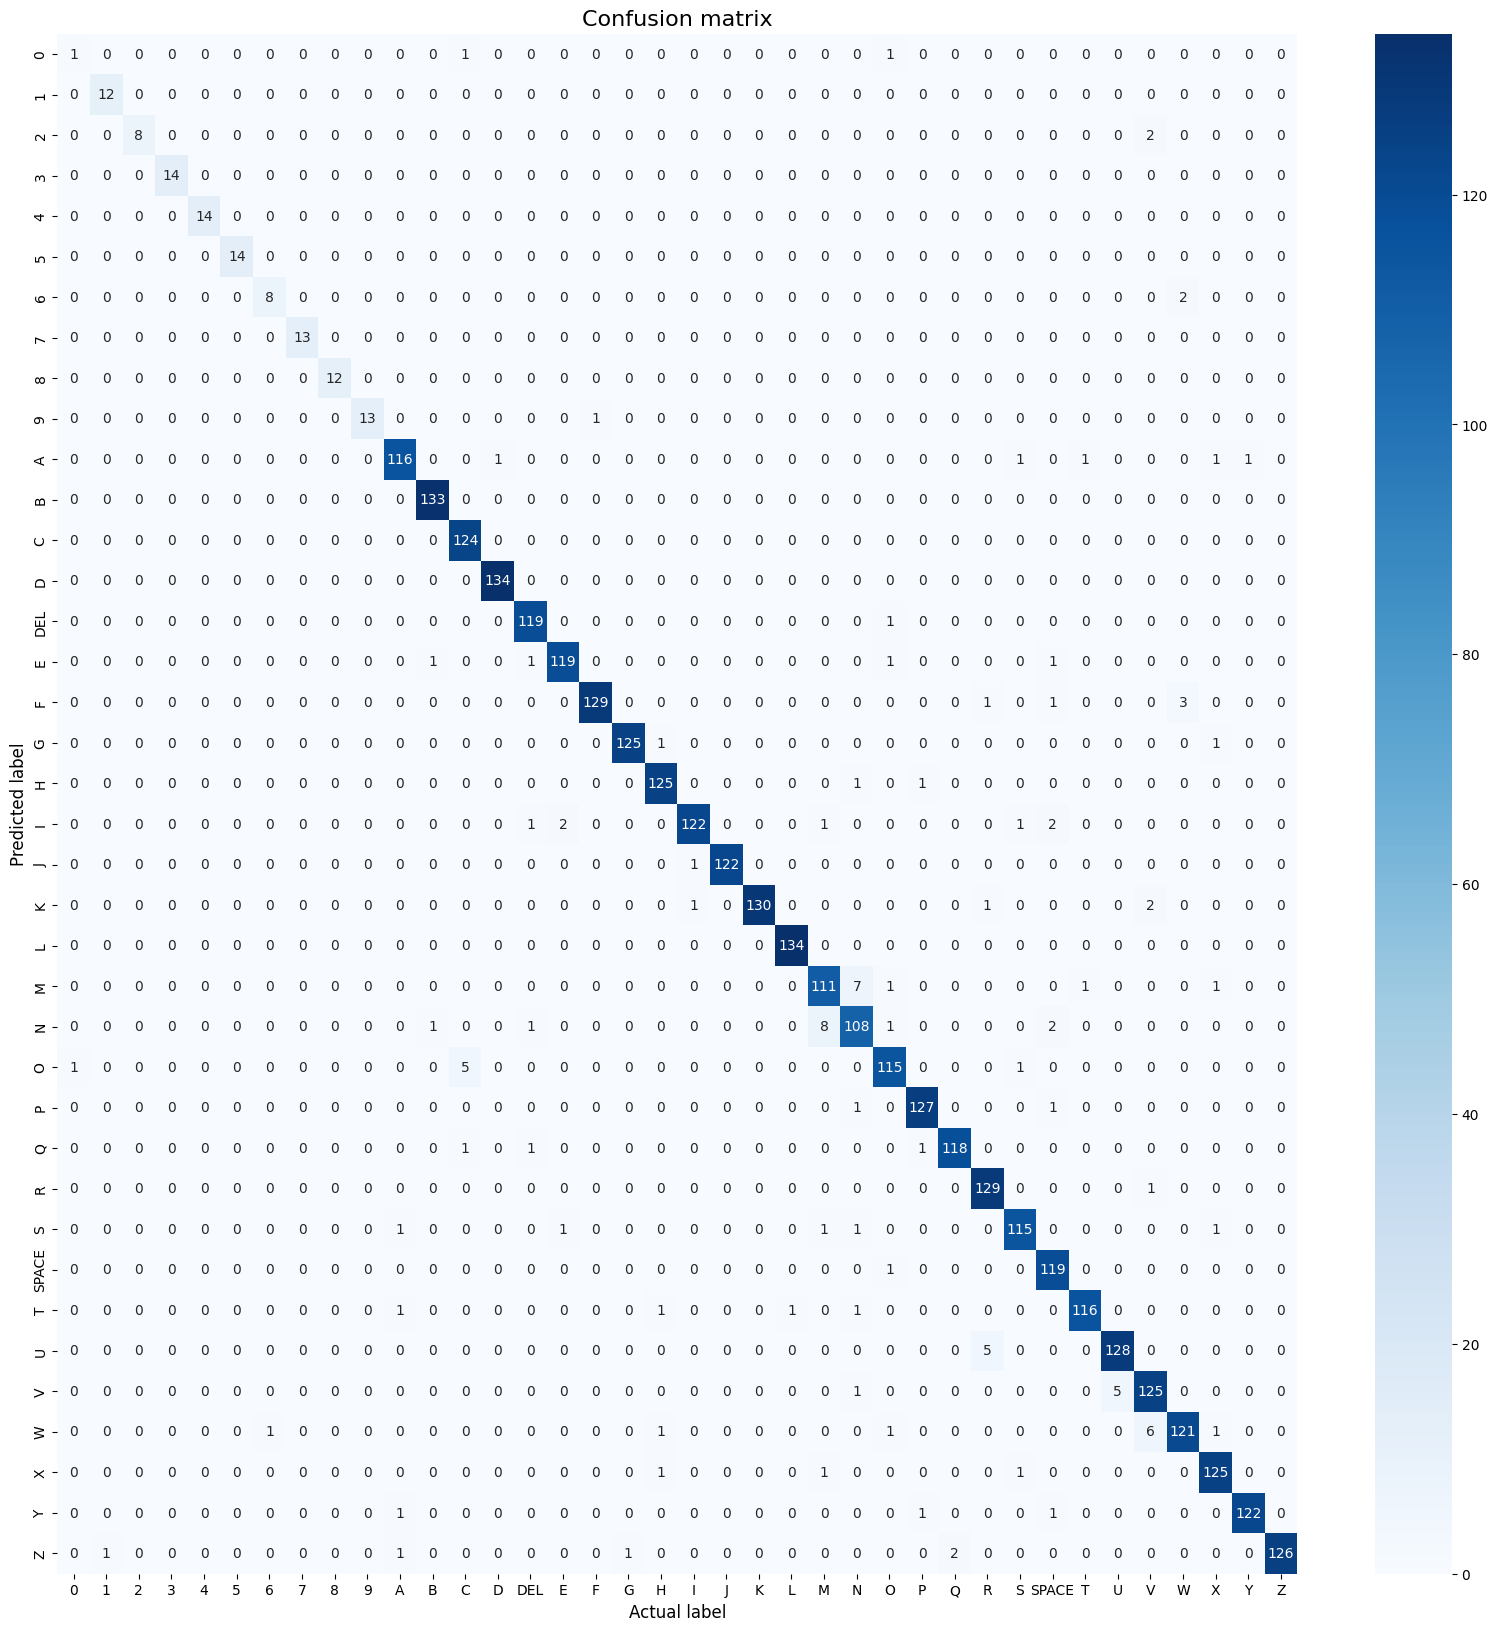

In [ ]:
plot_confusion_matrix(rf, X_test, y_test)

####GBC

In [66]:
# Initialize the model
gbm = GradientBoostingClassifier(n_estimators=10, learning_rate=0.2, max_depth=8, random_state=42,verbose= 1)


In [67]:
# Train the model
gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1671            2.11m
         2           0.0802            2.17m
         3           0.0518            1.95m
         4           0.0352            1.69m
         5           0.0244            1.43m
         6           0.0171            1.16m
         7           0.0121           52.18s
         8           0.0085           35.10s
         9           0.0060           17.64s
        10           0.0043            0.00s


GradientBoostingClassifier(learning_rate=0.2, max_depth=8, n_estimators=10,
                           random_state=42, verbose=1)

In [ ]:
# Save the model to a file
joblib.dump(gbm, 'GBC_model_XYZ.joblib')

['GBC_model_XYZ.joblib']

In [ ]:
import subprocess

# Set environment variables and run the scp command
command = "scp -r /content/GBC_model_XYZ.joblib '/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/GBC'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0

In [ ]:
# Make predictions
y_pred = gbm.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9382850901146914


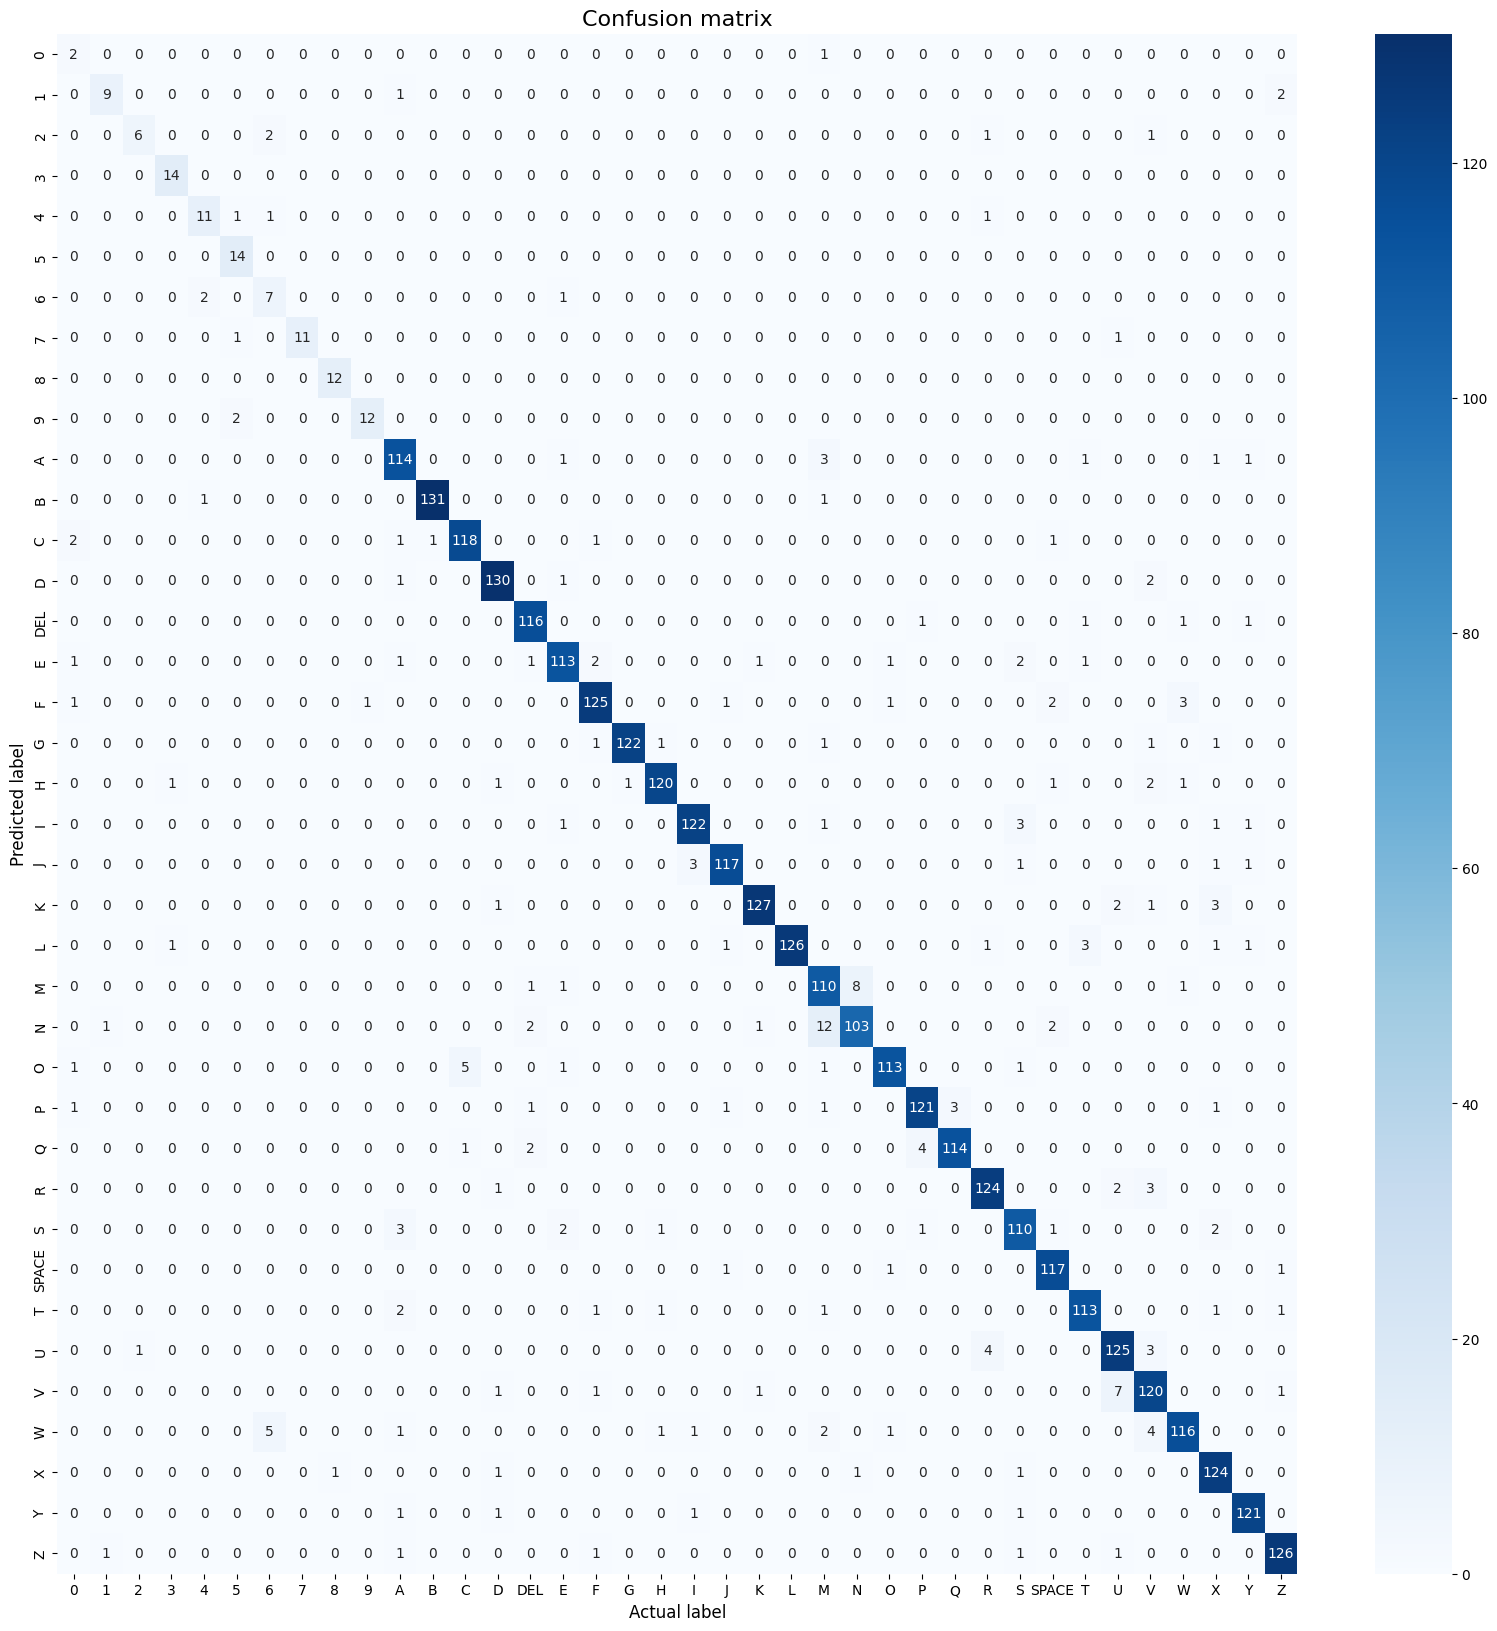

In [ ]:
plot_confusion_matrix(gbm, X_test, y_test)

####XGB

In [ ]:
# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the 'Category' column
df['Category_labelBinariz']= list(lb.fit_transform(df['Category']))

Category_labelBinariz= list(lb.fit_transform(df['Category']))

print(lb.classes_)
print(len(lb.classes_))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'DEL' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'SPACE' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z']
38


In [ ]:
# Create a mapping of categories to encoded values
category_mapping = dict(zip( range(0,38),lb.classes_))

print("classes:")
print(lb.classes_)

print("\nCategory to Encoding Mapping:")
print(category_mapping)

classes:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'DEL' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'SPACE' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z']

Category to Encoding Mapping:
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'DEL', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K', 22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'SPACE', 31: 'T', 32: 'U', 33: 'V', 34: 'W', 35: 'X', 36: 'Y', 37: 'Z'}


In [ ]:
X=df.iloc[:,:63].values
Y=np.array(Category_labelBinariz)

print(X.shape)
print(Y.shape)
print(X)
print(Y)

(18308, 63)
(18308, 38)
[[ 63 100 131 ... -16 -16 -14]
 [ 90 157 183 ... -28 -25 -21]
 [ 68  83 101 ... -29 -31 -32]
 ...
 [228 244 233 ...  -5  -6  -6]
 [194 225 240 ...  -7  -9  -9]
 [239 246 231 ...  -4  -5  -5]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Convert the dataset into an optimized data structure called DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print(dtrain)
print(dtest)





In [ ]:
# Set hyperparameters
params = {
    'objective': 'binary:logistic',  # for binary classification
    'max_depth': 5,
    'eta': 0.1,  # learning rate
    'eval_metric': 'logloss'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

In [ ]:
# Make predictions
y_pred = bst.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9437465865647188


####CatBC

In [ ]:
# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [6, 8, 10, 12]
}


In [ ]:
# Initialize the CatBoostClassifier
model = CatBoostClassifier(verbose=0)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')


In [31]:
# Fit the model to the data
grid_search.fit(X_train, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-7cb5e3bd6e93>", line 2, in <cell line: 2>
    grid_search.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1422, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 845, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 65, in __call__
    return supe

TypeError: object of type 'NoneType' has no len()

In [32]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [53]:
# Initialize the model
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.2, depth=12, verbose=1)

In [54]:
# Train the model
catboost_model.fit(X_train, y_train)

0:	learn: 1.9164778	total: 1m 6s	remaining: 1h 49m 20s
1:	learn: 1.5313124	total: 1m 59s	remaining: 1h 37m 24s
2:	learn: 1.2888526	total: 2m 50s	remaining: 1h 31m 55s
3:	learn: 1.1182654	total: 3m 43s	remaining: 1h 29m 14s
4:	learn: 0.9822012	total: 4m 33s	remaining: 1h 26m 31s
5:	learn: 0.8692260	total: 5m 22s	remaining: 1h 24m 17s
6:	learn: 0.7814035	total: 6m 14s	remaining: 1h 22m 50s
7:	learn: 0.7026533	total: 7m 3s	remaining: 1h 21m 13s
8:	learn: 0.6435153	total: 7m 53s	remaining: 1h 19m 45s
9:	learn: 0.5897973	total: 8m 45s	remaining: 1h 18m 45s
10:	learn: 0.5409486	total: 9m 34s	remaining: 1h 17m 32s
11:	learn: 0.4997445	total: 10m 24s	remaining: 1h 16m 18s
12:	learn: 0.4623015	total: 11m 16s	remaining: 1h 15m 27s
13:	learn: 0.4324282	total: 12m 5s	remaining: 1h 14m 19s
14:	learn: 0.4046871	total: 12m 55s	remaining: 1h 13m 14s
15:	learn: 0.3784381	total: 13m 47s	remaining: 1h 12m 24s
16:	learn: 0.3553954	total: 14m 37s	remaining: 1h 11m 22s
17:	learn: 0.3353990	total: 15m 26s	re

In [55]:
# Save the model to a file
joblib.dump(catboost_model, 'CatBC_model_XYZ.joblib')

['CatBC_model_XYZ.joblib']

In [59]:
import subprocess

# Set environment variables and run the scp command
command = "scp -r /content/CatBC_model_XYZ.joblib '/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/GBC'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0

In [60]:
# Make predictions
y_pred = catboost_model.predict(X_test)

print(y_pred)

[[11]
 [31]
 [29]
 ...
 [34]
 [29]
 [10]]


In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9533042053522666


###label binanze

In [ ]:
print(list(df['Category']))

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '6', '6', '6', '6', '6',

In [ ]:
# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the 'Category' column
df['Category_labelBinariz']= list(lb.fit_transform(df['Category']))

Category_labelBinariz= list(lb.fit_transform(df['Category']))

print(lb.classes_)
print(len(lb.classes_))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'DEL' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'SPACE' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z']
38


In [ ]:
print(Category_labelBinariz)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z14,z15,z16,z17,z18,z19,z20,0,Category,Category_labelBinariz
0,63,100,131,164,191,90,162,198,220,81,...,-13,-13,-11,-13,-16,-16,-14,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,90,157,183,212,233,66,126,187,231,56,...,-21,-20,-17,-24,-28,-25,-21,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,68,83,101,121,144,94,160,199,225,96,...,-32,-34,-34,-22,-29,-31,-32,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,84,117,148,181,205,97,153,203,232,86,...,-56,-56,-55,-36,-48,-50,-51,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,115,76,82,124,162,107,153,177,196,140,...,-21,-22,-22,-11,-18,-21,-23,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
# Create a mapping of categories to encoded values
category_mapping = dict(zip( range(0,38),lb.classes_))

print("classes:")
print(lb.classes_)

print("\nCategory to Encoding Mapping:")
print(category_mapping)

classes:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'DEL' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'SPACE' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z']

Category to Encoding Mapping:
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'DEL', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K', 22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'SPACE', 31: 'T', 32: 'U', 33: 'V', 34: 'W', 35: 'X', 36: 'Y', 37: 'Z'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

In [ ]:
X=df.iloc[:,:63].values
Y=np.array(Category_labelBinariz)

print(X.shape)
print(Y.shape)
print(X)
print(Y)

(18308, 63)
(18308, 38)
[[ 63 100 131 ... -16 -16 -14]
 [ 90 157 183 ... -28 -25 -21]
 [ 68  83 101 ... -29 -31 -32]
 ...
 [228 244 233 ...  -5  -6  -6]
 [194 225 240 ...  -7  -9  -9]
 [239 246 231 ...  -4  -5  -5]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Train the model
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Save the model to a file
joblib.dump(rf, 'random_forest_modelxyz_linary_.joblib')

['random_forest_modelxyz_linary_.joblib']

In [ ]:
import subprocess

# Set environment variables and run the scp command
command = "scp -r /content/random_forest_modelxyz_linary_.joblib '/content/drive/MyDrive/Work_space/Project/sign_language'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [ ]:
print(y_pred[0])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
from scipy.special import logit
print(logit(y_pred[1]))

[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf  inf -inf -inf -inf]


In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.80      0.89        15
           2       1.00      0.73      0.84        11
           3       1.00      1.00      1.00        13
           4       1.00      0.94      0.97        16
           5       1.00      1.00      1.00        16
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        19
          10       1.00      0.93      0.97       121
          11       0.99      0.99      0.99       122
          12       0.99      0.96      0.98       123
          13       1.00      0.96      0.98       122
          14       0.99      0.98      0.99       118
          15       1.00      0.96      0.98       119
          16       1.00      0.99      1.00

###LSTM

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create and fit the MinMaxScaler
scaler_xy = MinMaxScaler(feature_range=(0,300))

# Create and fit the MinMaxScaler
scaler_z = MinMaxScaler(feature_range=(-100,100))

# Function to apply MinMaxScaler to a row
def scale_row_xy(row):
    return scaler_xy.fit_transform(row.values.reshape(-1, 1)).flatten()

def scale_row_z(row):
    return scaler_z.fit_transform(row.values.reshape(-1, 1)).flatten()

# Apply the function row-wise
scaled_dfx = df.iloc[:,:21].apply(scale_row_xy, axis=1, result_type='expand')
scaled_dfy = df.iloc[:,21:42].apply(scale_row_xy, axis=1, result_type='expand')
scaled_dfz = df.iloc[:,42:63].apply(scale_row_z, axis=1, result_type='expand')
# Preserve the original column names

scaled_df=pd.concat([scaled_dfx,scaled_dfy,scaled_dfz],axis=1)
scaled_df.columns = df.columns[:63]
# Print the scaled DataFrame
print(scaled_df)


               x0          x1          x2          x3          x4          x5  \
0        0.000000   70.700637  129.936306  192.993631  244.585987   51.592357   
1       53.968254  160.317460  201.587302  247.619048  280.952381   15.873016   
2        0.000000   26.627219   58.579882   94.082840  134.911243   46.153846   
3        0.000000   64.705882  125.490196  190.196078  237.254902   25.490196   
4       76.973684    0.000000   11.842105   94.736842  169.736842   61.184211   
...           ...         ...         ...         ...         ...         ...   
16823  258.490566  292.452830  300.000000  254.716981  201.886792  211.320755   
16824  221.186441  282.203390  300.000000  269.491525  213.559322  241.525424   
16825  275.510204  300.000000  283.163265  215.816327  165.306122  225.000000   
16826  223.756906  275.138122  300.000000  248.618785  187.292818  223.756906   
16827  289.285714  300.000000  277.040816  208.163265  156.122449  221.938776   

               x6          

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf


In [ ]:
# Corresponding labels
labels = [0, 1, 0, 1,0,2,0,1]



# One-hot encode labels
y = to_categorical(labels)

In [ ]:
print(y)
print(type(y))

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
<class 'numpy.ndarray'>


In [ ]:
# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the 'Category' column
df['Category_labelBinariz']= list(lb.fit_transform(df['Category']))

Category_labelBinariz= list(lb.fit_transform(df['Category']))

print(lb.classes_)
print(len(lb.classes_))
print(type(Category_labelBinariz))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'DEL' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'SPACE' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z']
38
<class 'list'>


In [ ]:
# Create a mapping of categories to encoded values
category_mapping = dict(zip( range(0,38),lb.classes_))

print("classes:")
print(lb.classes_)

print("\nCategory to Encoding Mapping:")
print(category_mapping)

classes:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'DEL' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'SPACE' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z']

Category to Encoding Mapping:
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'DEL', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K', 22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'SPACE', 31: 'T', 32: 'U', 33: 'V', 34: 'W', 35: 'X', 36: 'Y', 37: 'Z'}


In [ ]:
X=scaled_df.iloc[:,:63].values
Y=np.array(Category_labelBinariz)

print(X.shape)
print(Y.shape)
print(X)
print(Y)
print(type(X))
print(type(Y))

(18308, 63)
(18308, 38)
[[   0.           70.70063694  129.93630573 ... -100.
  -100.          -78.94736842]
 [  53.96825397  160.31746032  201.58730159 ... -100.
   -83.78378378  -62.16216216]
 [   0.           26.62721893   58.57988166 ...  -31.81818182
   -40.90909091  -45.45454545]
 ...
 [ 275.51020408  300.          283.16326531 ...  -11.11111111
   -33.33333333  -33.33333333]
 [ 223.75690608  275.13812155  300.         ...  -16.66666667
   -50.          -50.        ]
 [ 289.28571429  300.          277.04081633 ...   38.46153846
    23.07692308   23.07692308]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14646, 63)
(3662, 63)
(14646, 38)
(3662, 38)


In [ ]:
# Reshape data to fit LSTM input requirements
X_train = np.expand_dims(X_train, axis=-1)
X_test= np.expand_dims(X_test, axis=-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14646, 63, 1)
(3662, 63, 1)
(14646, 38)
(3662, 38)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(38, activation='softmax'))  # Change to the number of classes


print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 63, 64)            16896     
                                                                 
 lstm_7 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 38)                4902      
                                                                 
Total params: 120614 (471.15 KB)
Trainable params: 120614 (471.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:

# Combine the directory and filename
model_path = '/content/sign_language_2.hdf5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)
# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss=CategoricalCrossentropy(),
             optimizer="adam",
             metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
  history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=64,
                      validation_data=( X_test, y_test),
                      verbose=1,
                      callbacks = [checkpoint,early_stop])

Epoch 1/100
225/229 [============================>.] - ETA: 0s - loss: 2.4160 - accuracy: 0.3098
Epoch 1: val_loss improved from inf to 1.62847, saving model to /content/sign_language_2.hdf5
229/229 [==============================] - 8s 13ms/step - loss: 2.4039 - accuracy: 0.3128 - val_loss: 1.6285 - val_accuracy: 0.5385
Epoch 2/100
228/229 [============================>.] - ETA: 0s - loss: 1.3470 - accuracy: 0.5981
Epoch 2: val_loss improved from 1.62847 to 1.00632, saving model to /content/sign_language_2.hdf5
229/229 [==============================] - 2s 10ms/step - loss: 1.3456 - accuracy: 0.5987 - val_loss: 1.0063 - val_accuracy: 0.7163
Epoch 3/100
224/229 [============================>.] - ETA: 0s - loss: 0.9468 - accuracy: 0.7251
Epoch 3: val_loss improved from 1.00632 to 0.75289, saving model to /content/sign_language_2.hdf5
229/229 [==============================] - 2s 10ms/step - loss: 0.9415 - accuracy: 0.7266 - val_loss: 0.7529 - val_accuracy: 0.7922
Epoch 4/100
224/229 [==

In [ ]:
import subprocess

# Set environment variables and run the scp command
command = "scp -r /content/sign_language_2.hdf5 '/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/LSTM_scaled'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0

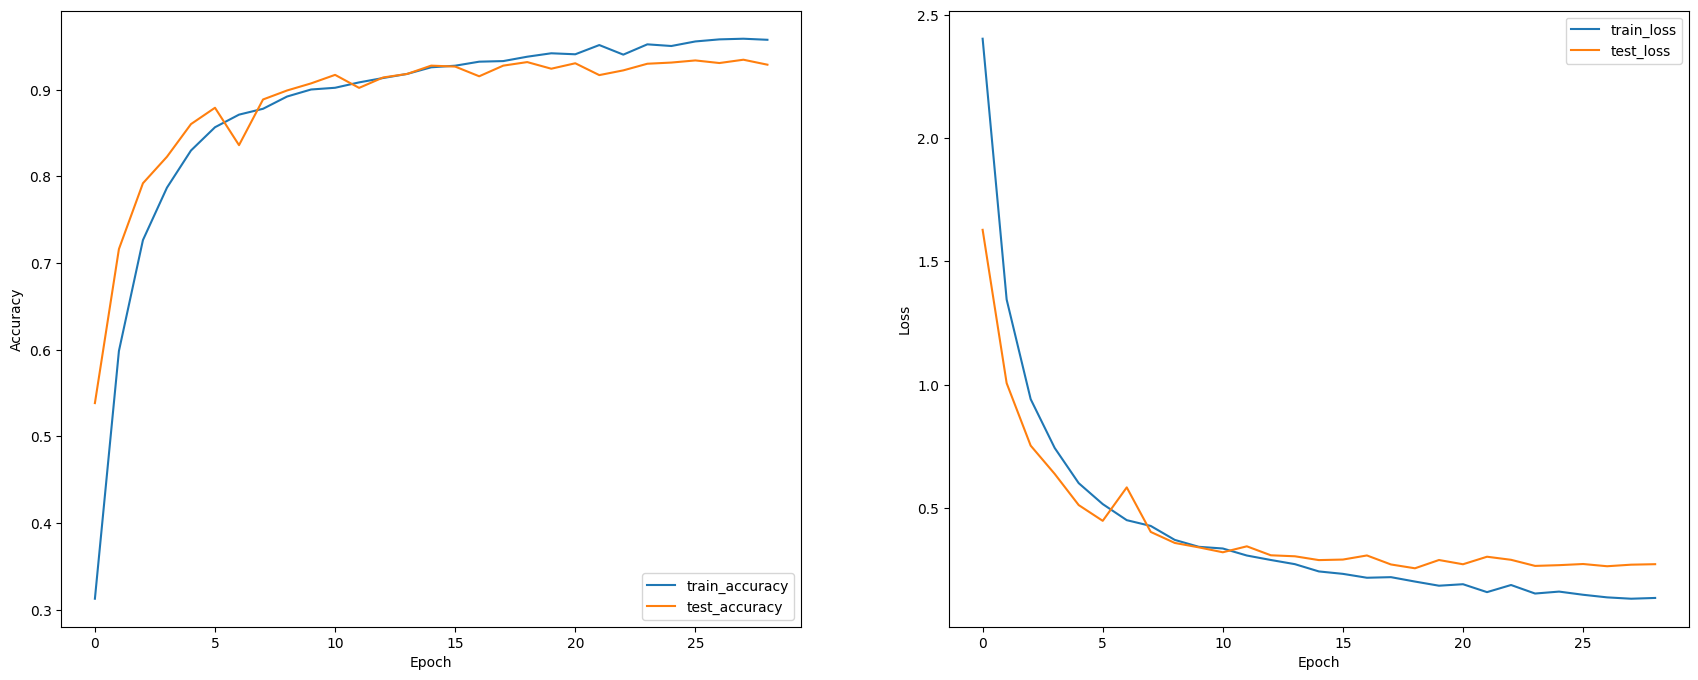

In [ ]:
plt.figure(figsize=(21, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='train_loss')
plt.plot(history.history["val_loss"], label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

##test

In [78]:
temp_charecter=["a"]
final_charecter=[]
alphabetical_character="a"
if len(temp_charecter) !=0 :
  if temp_charecter[-1]==alphabetical_character:
    temp_charecter.append(alphabetical_character)
    #if len(temp_charecter)>=(fps*wait_second):
    if len(temp_charecter)>=(3):
      final_charecter.append(temp_charecter[-1])
      temp_charecter.clear()
  else:
    temp_charecter.clear()
else:
  temp_charecter.append(alphabetical_character)

print(temp_charecter)
print(final_charecter)

['a', 'a']
[]


In [15]:
words=[]
final_charecter=["a","p","p","l","e","space","m","a","n","g","o"]
word=''
sentences=[]
for i in range(len(final_charecter)):
  if final_charecter[i]=="space":
    final_charecter.clear()
    words.append(word)

    break
  else:
    word=word+final_charecter[i]

sent= " ".join(words)
sentences.append(sent)

print(word)
print(words)
print(final_charecter)
print(sent)
print(sentences)


apple
['apple']
[]
apple
['apple']
